##### NSL-KDD Training using Support vector Machine

In [1]:
#Importing essential libraries
from sklearn.datasets import fetch_openml

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os 
import cv2
import random 
import math

from datetime import datetime

from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [2]:
#importing the training data csv
intrusion_train = pd.read_csv('KDDTrain.csv')

In [3]:
# mapping = {'ipsweep': 'Probe','satan': 'Probe','nmap': 'Probe','portsweep': 'Probe','saint': 'Probe','mscan': 'Probe',
#         'teardrop': 'DoS','pod': 'DoS','land': 'DoS','back': 'DoS','neptune': 'DoS','smurf': 'DoS','mailbomb': 'DoS',
#         'udpstorm': 'DoS','apache2': 'DoS','processtable': 'DoS',
#         'perl': 'U2R','loadmodule': 'U2R','rootkit': 'U2R','buffer_overflow': 'U2R','xterm': 'U2R','ps': 'U2R',
#         'sqlattack': 'U2R','httptunnel': 'U2R',
#         'ftp_write': 'R2L','phf': 'R2L','guess_passwd': 'R2L','warezmaster': 'R2L','warezclient': 'R2L','imap': 'R2L',
#         'spy': 'R2L','multihop': 'R2L','named': 'R2L','snmpguess': 'R2L','worm': 'R2L','snmpgetattack': 'R2L',
#         'xsnoop': 'R2L','xlock': 'R2L','sendmail': 'R2L',
#         'normal': 'Normal'
#         }

# intrusion_train['attack_class'] = intrusion_train['labels'].apply(lambda v: mapping[v])

mapping = { 'ipsweep': 'Attack','satan': 'Attack','nmap': 'Attack','portsweep': 'Attack','saint': 'Attack','mscan': 'Attack',
        'teardrop': 'Attack','pod': 'Attack','land': 'Attack','back': 'Attack','neptune': 'Attack','smurf': 'Attack','mailbomb': 'Attack',
        'udpstorm': 'Attack','apache2': 'Attack','processtable': 'Attack',
        'perl': 'Attack','loadmodule': 'Attack','rootkit': 'Attack','buffer_overflow': 'Attack','xterm': 'Attack','ps': 'Attack',
        'sqlattack': 'Attack','httptunnel': 'Attack',
        'ftp_write': 'Attack','phf': 'Attack','guess_passwd': 'Attack','warezmaster': 'Attack','warezclient': 'Attack','imap': 'Attack',
        'spy': 'Attack','multihop': 'Attack','named': 'Attack','snmpguess': 'Attack','worm': 'Attack','snmpgetattack': 'Attack',
        'xsnoop': 'Attack','xlock': 'Attack','sendmail': 'Attack',
        'normal': 'Non-Attack'
        }

intrusion_train['attack_class'] = intrusion_train['labels'].apply(lambda v: mapping[v])

In [4]:
intrusion_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [5]:
intrusion_train['class']= pd.Categorical(intrusion_train['attack_class'],['Attack', 'Non-Attack'])
intrusion_train['class']= intrusion_train['class'].cat.codes
intrusion_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,attack_class,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,Non-Attack,1
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,Non-Attack,1
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,Attack,0
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,Non-Attack,1
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,Non-Attack,1


In [6]:
intrusion_train['protocol_type']=pd.Categorical(intrusion_train['protocol_type'],['tcp', 'icmp', 'udp'])
intrusion_train['protocol_type']= intrusion_train['protocol_type'].cat.codes
intrusion_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,attack_class,class
0,0,0,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,Non-Attack,1
1,0,2,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,Non-Attack,1
2,0,0,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,Attack,0
3,0,0,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,Non-Attack,1
4,0,0,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,Non-Attack,1


In [7]:
intrusion_train['service'].unique()

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [8]:
intrusion_train['service']=pd.Categorical(intrusion_train['service'],['private', 'ftp_data', 'eco_i', 'telnet', 'http', 'smtp', 'ftp',
       'ldap', 'pop_3', 'courier', 'discard', 'ecr_i', 'imap4',
       'domain_u', 'mtp', 'systat', 'iso_tsap', 'other', 'csnet_ns',
       'finger', 'uucp', 'whois', 'netbios_ns', 'link', 'Z39_50',
       'sunrpc', 'auth', 'netbios_dgm', 'uucp_path', 'vmnet', 'domain',
       'name', 'pop_2', 'http_443', 'urp_i', 'login', 'gopher', 'exec',
       'time', 'remote_job', 'ssh', 'kshell', 'sql_net', 'shell',
       'hostnames', 'echo', 'daytime', 'pm_dump', 'IRC', 'netstat', 'ctf',
       'nntp', 'netbios_ssn', 'tim_i', 'supdup', 'bgp', 'nnsp', 'rje',
       'printer', 'efs', 'X11', 'ntp_u', 'klogin', 'tftp_u'])
intrusion_train['service']= intrusion_train['service'].cat.codes
intrusion_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,attack_class,class
0,0,0,1,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,Non-Attack,1
1,0,2,17,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,Non-Attack,1
2,0,0,0,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,Attack,0
3,0,0,4,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,Non-Attack,1
4,0,0,4,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,Non-Attack,1


In [9]:
intrusion_train['flag']=pd.Categorical(intrusion_train['flag'],['REJ', 'SF', 'RSTO', 'S0', 'RSTR', 'SH', 'S3', 'S2', 'S1',
       'RSTOS0', 'OTH'])
intrusion_train['flag']= intrusion_train['flag'].cat.codes
intrusion_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,attack_class,class
0,0,0,1,1,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,Non-Attack,1
1,0,2,17,1,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,Non-Attack,1
2,0,0,0,3,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,Attack,0
3,0,0,4,1,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,Non-Attack,1
4,0,0,4,1,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,Non-Attack,1


In [10]:
intrusion_train['labels']=pd.Categorical(intrusion_train['labels'],['neptune', 'normal', 'saint', 'mscan', 'guess_passwd', 'smurf',
       'apache2', 'satan', 'buffer_overflow', 'back', 'warezmaster',
       'snmpgetattack', 'processtable', 'pod', 'httptunnel', 'nmap', 'ps',
       'snmpguess', 'ipsweep', 'mailbomb', 'portsweep', 'multihop',
       'named', 'sendmail', 'loadmodule', 'xterm', 'worm', 'teardrop',
       'rootkit', 'xlock', 'perl', 'land', 'xsnoop', 'sqlattack',
       'ftp_write', 'imap', 'udpstorm', 'phf'])
intrusion_train['labels']= intrusion_train['labels'].cat.codes
intrusion_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,attack_class,class
0,0,0,1,1,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1,Non-Attack,1
1,0,2,17,1,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1,Non-Attack,1
2,0,0,0,3,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0,Attack,0
3,0,0,4,1,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1,Non-Attack,1
4,0,0,4,1,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,Non-Attack,1


In [11]:
#Spliting the training data into input and labels
y_train=intrusion_train[['class']].values

X_train = intrusion_train[['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate']].values

In [12]:
digit_train, counts_train = np.unique(y_train, return_counts = True)

distribution_train = dict(zip(digit_train, counts_train))
print(distribution_train)

{0: 58630, 1: 67343}


There is an imbalance in the data proportion contributed from each class 

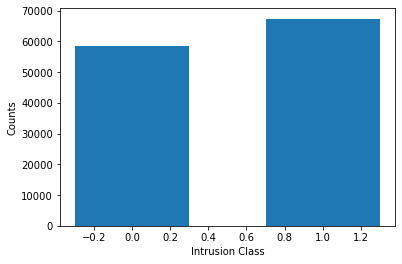

In [13]:
plt.bar(list(distribution_train.keys()),distribution_train.values(),width =0.6)
plt.xlabel('Intrusion Class')
plt.ylabel('Counts')
plt.show()

In [14]:
##Spliting the training data into validation set (20%)
#X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)
#print(X_train.shape, X_val.shape)
#print(y_train.shape, y_val.shape)

In [15]:
# import tensorflow as tf
# from tensorflow import keras
# tf.config.set_visible_devices([], 'GPU')
# print("Tensorflow Version:", tf.__version__)
# print("Keras Version:", keras.__version__)

In [16]:
#####          https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/


# compare standalone models for binary classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

# get a stacking ensemble of models
#def get_stacking():
    # define the base models
level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
    #level0.append(('svm', SVC()))
    #level0.append(('bayes', GaussianNB()))
    # define meta learner model
level1 = LogisticRegression()
    # define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
model.fit(X_train, y_train.ravel())
#    return model

# def get_stacking(models):
#     # define the base models
#     level0 = list()
#     level0.append(('lr', models['lr']))
#     level0.append(('knn', models['knn']))
#     level0.append(('cart', models['cart']))
#     #level0.append(('svm', SVC()))
#     level0.append(('bayes', models['bayes']))
#     # define meta learner model
#     level1 = LogisticRegression()
#     # define the stacking ensemble
#     model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
#     return model


# get a list of models to evaluate
# def get_models():
#     models = dict()
#     #models['lr'] = LogisticRegression()
#     #models['knn'] = KNeighborsClassifier()
#     #models['cart'] = DecisionTreeClassifier()
#     ##models['svm'] = SVC()
#     #models['bayes'] = GaussianNB()
#     models['stacking'] = get_stacking()
#     return models

# # evaluate a given model using cross-validation
# def evaluate_model(model, X, y):
#     cv = StratifiedKFold(n_splits=10)
#     scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
#     return scores

# # get the models to evaluate
# models = get_models()

# # evaluate the models and store results
# results, names = list(), list()
# for name, model in models.items():
#     scores = evaluate_model(model, X_train, y_train)
#     results.append(scores)
#     names.append(name)
#     print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    
# # plot model performance for comparison
# pyplot.boxplot(results, labels=names, showmeans=True)
# pyplot.show()

e:\code\ml\my_env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
e:\code\ml\my_env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_opt

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression()),
                               ('knn', KNeighborsClassifier()),
                               ('cart', DecisionTreeClassifier())],
                   final_estimator=LogisticRegression())

In [17]:
##Adaptive Learning Rate
#from tensorflow.keras.callbacks import LearningRateScheduler
#def step_decay(epoch):
#   initial_lrate = 0.1 #Setting the initial learning rate to 0.1 
#   drop = 0.5
#   epochs_drop = 10.0  #Drops the learning rate to half after every 10 epochs
#   lrate = initial_lrate * math.pow(drop,  
#           math.floor((1+epoch)/epochs_drop))
#   return lrate
#lrate = LearningRateScheduler(step_decay)

In [18]:
#from sklearn.neighbors import KNeighborsClassifier
#model = KNeighborsClassifier()
#model.fit(X_train,y_train)

#from tensorflow.keras.optimizers import SGD

#model = keras. models.Sequential()
#model.add(keras.layers.Dense(300, activation ="relu"))
#model.add(keras.layers.Dense(300, activation ="relu"))
#model.add(keras.layers.Dense(300, activation ="relu"))
#model.add(keras.layers.Dense(5, activation = "softmax"))

#sgd = SGD(learning_rate=0.001)
#model.compile(optimizer=sgd,
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])

#model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data =(X_val,y_val), callbacks=[lrate])

#from sklearn.naive_bayes import GaussianNB
#model1 = GaussianNB()
#start_time = time.time()
#model1.fit(X_train, Y_train.values.ravel())
#end_time = time.time()
#print("Training time: ",end_time-start_time)

#from sklearn.datasets import make_moons
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler
#from sklearn.svm import LinearSVC


#polynomial_svm_clf = Pipeline([
#        ("poly_features", PolynomialFeatures(degree=3)),
#        ("scaler", StandardScaler()),
#        ("svm_clf", LinearSVC(C=10, loss="hinge"))
#    ])

#polynomial_svm_clf.fit(X_train, y_train)

In [19]:
#Importing the test data
intrusion_test = pd.read_csv('KDDTest.csv') 

In [20]:
mapping = {'ipsweep': 'Attack','satan': 'Attack','nmap': 'Attack','portsweep': 'Attack','saint': 'Attack','mscan': 'Attack',
        'teardrop': 'Attack','pod': 'Attack','land': 'Attack','back': 'Attack','neptune': 'Attack','smurf': 'Attack','mailbomb': 'Attack',
        'udpstorm': 'Attack','apache2': 'Attack','processtable': 'Attack',
        'perl': 'Attack','loadmodule': 'Attack','rootkit': 'Attack','buffer_overflow': 'Attack','xterm': 'Attack','ps': 'Attack',
        'sqlattack': 'Attack','httptunnel': 'Attack',
        'ftp_write': 'Attack','phf': 'Attack','guess_passwd': 'Attack','warezmaster': 'Attack','warezclient': 'Attack','imap': 'Attack',
        'spy': 'Attack','multihop': 'Attack','named': 'Attack','snmpguess': 'Attack','worm': 'Attack','snmpgetattack': 'Attack',
        'xsnoop': 'Attack','xlock': 'Attack','sendmail': 'Attack',
        'normal': 'Non-Attack'
        }

intrusion_test['attack_class'] = intrusion_test['labels'].apply(lambda v: mapping[v])

In [21]:
intrusion_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,attack_class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,Attack
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,Attack
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,Non-Attack
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,Attack
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,Attack


In [22]:
intrusion_test["attack_class"].unique()

array(['Attack', 'Non-Attack'], dtype=object)

In [23]:
#Handling the test categorical values
intrusion_test['class']= pd.Categorical(intrusion_test['attack_class'],['Attack', 'Non-Attack'])
intrusion_test['class']= intrusion_test['class'].cat.codes

intrusion_test['protocol_type']=pd.Categorical(intrusion_test['protocol_type'],['tcp', 'icmp', 'udp'])
intrusion_test['protocol_type']= intrusion_test['protocol_type'].cat.codes


intrusion_test['service']=pd.Categorical(intrusion_test['service'],['private', 'ftp_data', 'eco_i', 'telnet', 'http', 'smtp', 'ftp',
       'ldap', 'pop_3', 'courier', 'discard', 'ecr_i', 'imap4',
       'domain_u', 'mtp', 'systat', 'iso_tsap', 'other', 'csnet_ns',
       'finger', 'uucp', 'whois', 'netbios_ns', 'link', 'Z39_50',
       'sunrpc', 'auth', 'netbios_dgm', 'uucp_path', 'vmnet', 'domain',
       'name', 'pop_2', 'http_443', 'urp_i', 'login', 'gopher', 'exec',
       'time', 'remote_job', 'ssh', 'kshell', 'sql_net', 'shell',
       'hostnames', 'echo', 'daytime', 'pm_dump', 'IRC', 'netstat', 'ctf',
       'nntp', 'netbios_ssn', 'tim_i', 'supdup', 'bgp', 'nnsp', 'rje',
       'printer', 'efs', 'X11', 'ntp_u', 'klogin', 'tftp_u'])
intrusion_test['service']= intrusion_test['service'].cat.codes


intrusion_test['flag']=pd.Categorical(intrusion_test['flag'],['REJ', 'SF', 'RSTO', 'S0', 'RSTR', 'SH', 'S3', 'S2', 'S1',
       'RSTOS0', 'OTH'])
intrusion_test['flag']= intrusion_test['flag'].cat.codes



intrusion_test['labels']=pd.Categorical(intrusion_test['labels'],['neptune', 'normal', 'saint', 'mscan', 'guess_passwd', 'smurf',
       'apache2', 'satan', 'buffer_overflow', 'back', 'warezmaster',
       'snmpgetattack', 'processtable', 'pod', 'httptunnel', 'nmap', 'ps',
       'snmpguess', 'ipsweep', 'mailbomb', 'portsweep', 'multihop',
       'named', 'sendmail', 'loadmodule', 'xterm', 'worm', 'teardrop',
       'rootkit', 'xlock', 'perl', 'land', 'xsnoop', 'sqlattack',
       'ftp_write', 'imap', 'udpstorm', 'phf'])
intrusion_test['labels']= intrusion_test['labels'].cat.codes
intrusion_test.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,attack_class,class
0,0,0,0,0,0,0,0,0,0,0,...,0.06,0.00,0.00,0.0,0.0,1.00,1.00,0,Attack,0
1,0,0,0,0,0,0,0,0,0,0,...,0.06,0.00,0.00,0.0,0.0,1.00,1.00,0,Attack,0
2,2,0,1,1,12983,0,0,0,0,0,...,0.04,0.61,0.02,0.0,0.0,0.00,0.00,1,Non-Attack,1
3,0,1,2,1,20,0,0,0,0,0,...,0.00,1.00,0.28,0.0,0.0,0.00,0.00,2,Attack,0
4,1,0,3,2,0,15,0,0,0,0,...,0.17,0.03,0.02,0.0,0.0,0.83,0.71,3,Attack,0


In [24]:
y_test=intrusion_test[['class']].values

X_test = intrusion_test[['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate']].values

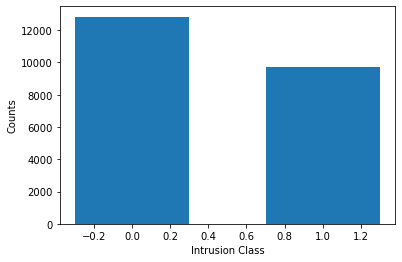

In [25]:
digit_test, counts_test = np.unique(y_test, return_counts = True)

distribution_test = dict(zip(digit_test, counts_test))
plt.bar(list(distribution_test.keys()),distribution_test.values(),width =0.6)
plt.xlabel('Intrusion Class')
plt.ylabel('Counts')
plt.show()

In [26]:
#Y_test_pred1 = models['lr'].predict(X_test)
Y_test_pred1 = model.predict(X_test)

In [27]:
# # define dataset
# X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# # define the base models
# level0 = list()
# level0.append(('lr', LogisticRegression()))
# level0.append(('knn', KNeighborsClassifier()))
# level0.append(('cart', DecisionTreeClassifier()))
# #level0.append(('svm', SVC()))
# level0.append(('bayes', GaussianNB()))
# # define meta learner model
# level1 = LogisticRegression()
# # define the stacking ensemble
# model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
# # fit the model on all available data
# model.fit(X, y)
# # make a prediction for one example
# data = [[2.47475454,0.40165523,1.68081787,2.88940715,0.91704519,-3.07950644,4.39961206,0.72464273,-4.86563631,-6.06338084,-1.22209949,-0.4699618,1.01222748,-0.6899355,-0.53000581,6.86966784,-3.27211075,-6.59044146,-2.21290585,-3.139579]]
# yhat = model.predict(data)
# print('Predicted Class: %d' % (yhat))

In [28]:
print("Train score is:", model.score(X_train, y_train))
print("Test score is:",model.score(X_test,y_test))

Train score is: 0.999944432537131
Test score is: 0.7702714691270405


In [29]:
#knn_prediction = model.predict(X_test)
#print("Accuracy score for KNN:",accuracy_score(y_test,knn_prediction))

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

print('Confusion Matrix')
print(confusion_matrix(Y_test_pred1, y_test))
print('Classification Report')
print(classification_report(Y_test_pred1, y_test))

Confusion Matrix
[[7909  255]
 [4924 9456]]
Classification Report
              precision    recall  f1-score   support

           0       0.62      0.97      0.75      8164
           1       0.97      0.66      0.79     14380

    accuracy                           0.77     22544
   macro avg       0.80      0.81      0.77     22544
weighted avg       0.84      0.77      0.77     22544

